<a href="https://colab.research.google.com/github/anushna9/TE_ML_Assignments/blob/main/2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('temperatures.csv')
data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [ ]:
data.shape

(117, 18)

In [ ]:
data.head

<bound method NDFrame.head of      YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0    1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47   
1    1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80   
2    1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85   
3    1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04   
4    1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
112  2013  24.56  26.59  30.62  32.66  34.46  32.44  31.07  30.76  31.04   
113  2014  23.83  25.97  28.95  32.74  33.77  34.15  31.85  31.32  30.68   
114  2015  24.58  26.89  29.07  31.87  34.09  32.48  31.88  31.52  31.55   
115  2016  26.94  29.72  32.62  35.38  35.72  34.03  31.64  31.79  31.66   
116  2017  26.45  29.46  31.60  34.95  35.84  33.82  31.88  31.72  32.22   

       OCT    NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-S

In [ ]:
data.dtypes

YEAR         int64
JAN        float64
FEB        float64
MAR        float64
APR        float64
MAY        float64
JUN        float64
JUL        float64
AUG        float64
SEP        float64
OCT        float64
NOV        float64
DEC        float64
ANNUAL     float64
JAN-FEB    float64
MAR-MAY    float64
JUN-SEP    float64
OCT-DEC    float64
dtype: object

In [ ]:
data.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.corr()["YEAR"].sort_values(ascending = False)

YEAR       1.000000
ANNUAL     0.801129
OCT-DEC    0.749792
DEC        0.732222
NOV        0.697887
JAN-FEB    0.679869
JUN-SEP    0.677061
SEP        0.664008
AUG        0.654138
FEB        0.647066
MAR-MAY    0.640438
OCT        0.589073
JAN        0.575499
MAR        0.553886
APR        0.540662
JUL        0.478512
MAY        0.407648
JUN        0.371840
Name: YEAR, dtype: float64

In [ ]:
#Highest correlated month - Dec
x1 = data[["YEAR"]]
y1 = data["DEC"]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)
lr1 = LinearRegression()
lr1.fit(x1_train, y1_train)
y1_train_lr1 = lr1.predict(x1_train)
y1_test_lr1 = lr1.predict(x1_test)
print("Intercept of Highest correlated is: ", lr1.intercept_)
print("Slope of Highest correlated is: ", lr1.coef_)

#Least correlated month - JUN
x2 = data[["YEAR"]]
y2 = data["JUN"]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)
lr2 = LinearRegression()
lr2.fit(x2_train, y2_train)
y2_train_lr2 = lr2.predict(x2_train)
y2_test_lr2 = lr2.predict(x2_test)
print("Intercept of Least correlated is: ", lr2.intercept_)
print("Slope of Least correlated is: ", lr2.coef_)

Intercept of Highest correlated is:  -6.042685690461912
Slope of Highest correlated is:  [0.01563361]
Intercept of Least correlated is:  18.51475615571578
Slope of Least correlated is:  [0.00725058]


In [ ]:
#highest correlated month
print("Error for highest correlated moth. - dec")
print("Training error:- ")
print("R Squared error = ", r2_score(y1_train, y1_train_lr1))
print("mean_squared_error = ", mean_squared_error(y1_train, y1_train_lr1))
print("mean_absolute_error = ", mean_absolute_error(y1_train, y1_train_lr1))
print("root mean_squared_error = ", np.sqrt(mean_squared_error(y1_train, y1_train_lr1)))
print('\n')
print("Testing error:- ")
print("R Squared error = ", r2_score(y1_test, y1_test_lr1))
print("mean_squared_error = ", mean_squared_error(y1_test, y1_test_lr1))
print("mean_absolute_error = ", mean_absolute_error(y1_test, y1_test_lr1))
print("root mean_squared_error = ", np.sqrt(mean_squared_error(y1_test, y1_test_lr1)))
print('\n')
# least correlated month - jun
print("Error for least correlated moth. - jun")
print("Training error:- ")
print("R Squared error = ", r2_score(y2_train, y2_train_lr2))
print("mean_squared_error = ", mean_squared_error(y2_train, y2_train_lr2))
print("mean_absolute_error = ", mean_absolute_error(y2_train, y2_train_lr2))
print("root mean_squared_error = ", np.sqrt(mean_squared_error(y2_train, y2_train_lr2)))
print('\n')
print("Testing error:- ")
print("R Squared error = ", r2_score(y2_test, y2_test_lr2))
print("mean_squared_error = ", mean_squared_error(y2_test, y2_test_lr2))
print("mean_absolute_error = ", mean_absolute_error(y2_test, y2_test_lr2))
print("root mean_squared_error = ", np.sqrt(mean_squared_error(y2_test, y2_test_lr2)))
print('\n')

Error for highest correlated moth. - dec
Training error:- 
R Squared error =  0.538254678023143
mean_squared_error =  0.22886173848942998
mean_absolute_error =  0.35456898080983573
root mean_squared_error =  0.4783949607692685


Testing error:- 
R Squared error =  0.5170575940645485
mean_squared_error =  0.49825939386703366
mean_absolute_error =  0.4814995951587678
root mean_squared_error =  0.7058749137538701


Error for least correlated moth. - jun
Training error:- 
R Squared error =  0.14600066895689667
mean_squared_error =  0.3356509640397001
mean_absolute_error =  0.47614631895109405
root mean_squared_error =  0.5793539194997304


Testing error:- 
R Squared error =  -0.069129782274018
mean_squared_error =  0.38456134236372935
mean_absolute_error =  0.49514306129104274
root mean_squared_error =  0.6201301011592079




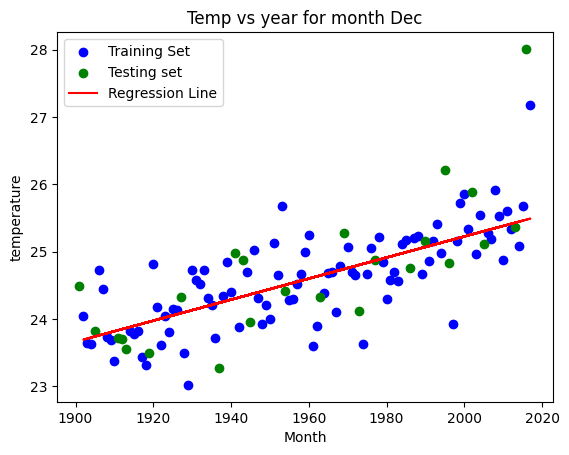

In [ ]:
#graph for highest correated data
plt.scatter(x1_train,y1_train,color = 'blue')
plt.scatter(x1_test,y1_test,color = 'green')
plt.plot(x1_train,lr1.predict(x1_train),color = 'red')
plt.legend(['Training Set', 'Testing set', 'Regression Line'])
plt.title("Temp vs year for month Dec")
plt.xlabel('Month')
plt.ylabel('temperature')
plt.show()

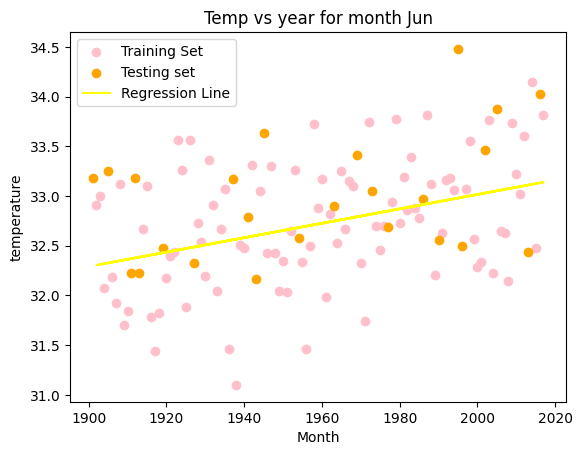

In [ ]:
#graph for least correated data
plt.scatter(x2_train,y2_train,color = 'pink')
plt.scatter(x2_test,y2_test,color = 'orange')
plt.plot(x2_train,lr2.predict(x2_train),color = 'yellow')
plt.legend(['Training Set', 'Testing set', 'Regression Line'])
plt.title("Temp vs year for month Jun")
plt.xlabel('Month')
plt.ylabel('temperature')
plt.show()

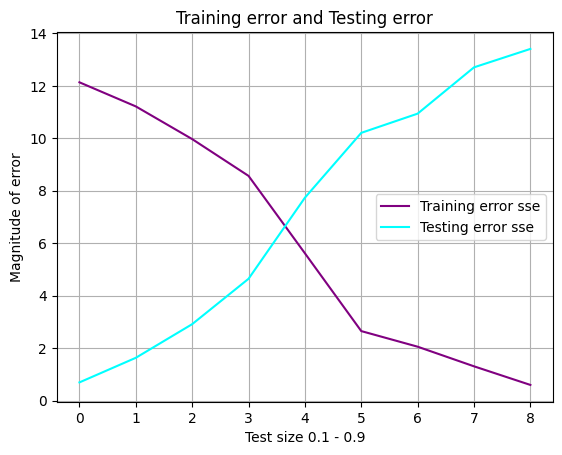

In [ ]:
X = data.iloc[ : , 0:1]
Y = data.iloc[ : , 13:14]
train_SSE = []
test_SSE = []
for n in range (1,10):
  n /= 10.0
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = n, random_state = 2)
  lr = LinearRegression()
  lr.fit(x_train, y_train)
  y_train_lr = lr.predict(x_train)
  y_test_lr = lr.predict(x_test)
  train_SSE.append(np.sum((y_train_lr - y_train)**2))
  test_SSE.append(np.sum((y_test_lr - y_test)**2))

plt.plot(train_SSE, color = 'purple', label = 'Train')
plt.plot(test_SSE, color = 'cyan', label = 'Test')
plt.title("Training error and Testing error")
plt.legend(["Training error sse","Testing error sse"])
plt.xlabel("Test size 0.1 - 0.9")
plt.ylabel("Magnitude of error")
plt.grid(True)
plt.show()

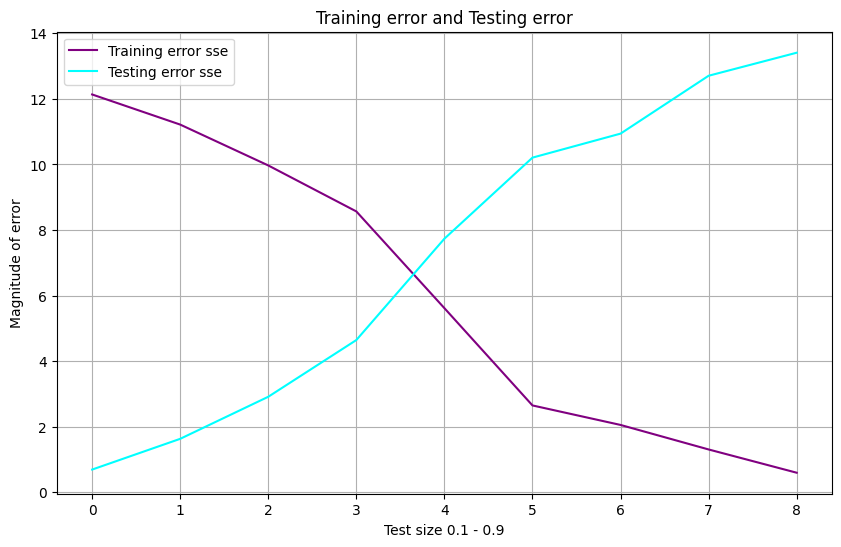

In [ ]:
X = data.iloc[ : , 0:1]
Y = data.iloc[ : , 13:14]
train_SSE = []
test_SSE = []
for n in range (1,10):
  n /= 10.0
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = n, random_state = 2)
  lr = LinearRegression()
  lr.fit(x_train, y_train)
  y_train_lr = lr.predict(x_train)
  y_test_lr = lr.predict(x_test)
  train_SSE.append(np.sum((y_train_lr - y_train)**2))
  test_SSE.append(np.sum((y_test_lr - y_test)**2))

plt.figure(figsize=(10, 6))
plt.plot(train_SSE, color = 'purple', label = 'Train')
plt.plot(test_SSE, color = 'cyan', label = 'Test')
plt.title("Training error and Testing error")
plt.legend(["Training error sse","Testing error sse"])
plt.xlabel("Test size 0.1 - 0.9")
plt.ylabel("Magnitude of error")
plt.grid(True)
plt.show()